In [ ]:
# launch 100 requests on http://app2.test:8666/
# and measure execution time in ms
target = 'http://app2.test:8666/'

import requests
import time

start = time.time()
for i in range(1000):
    print ('Request #{}'.format(i))
    requests.get(target)
end = time.time()

print('Execution time: {} ms'.format((end - start) * 1000))

In [ ]:
# launch 100 requests on http://app2.test:8666/
# and measure execution time in ms
target = 'http://fastify.test:8666/'

import requests
import time

start = time.time()
for i in range(1000):
    print ('Request #{}'.format(i))
    requests.get(target)
end = time.time()

print('Execution time: {} ms'.format((end - start) * 1000))

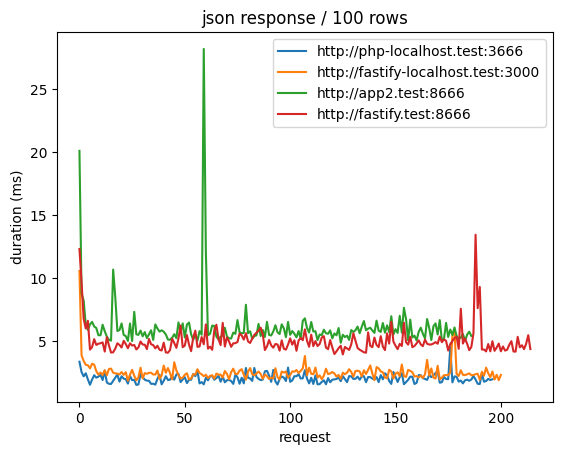

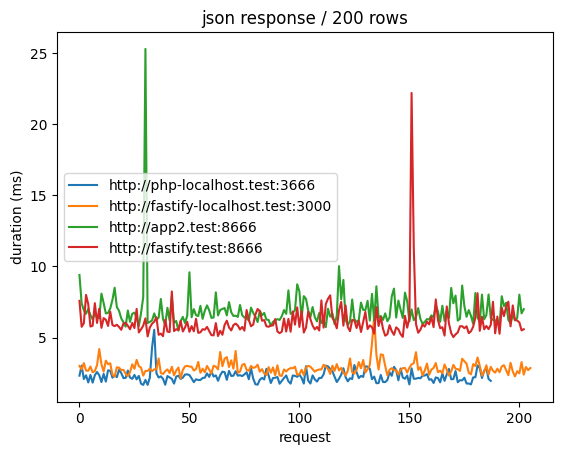

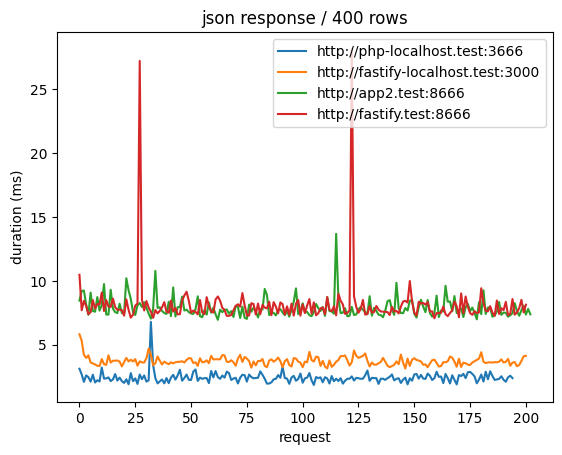

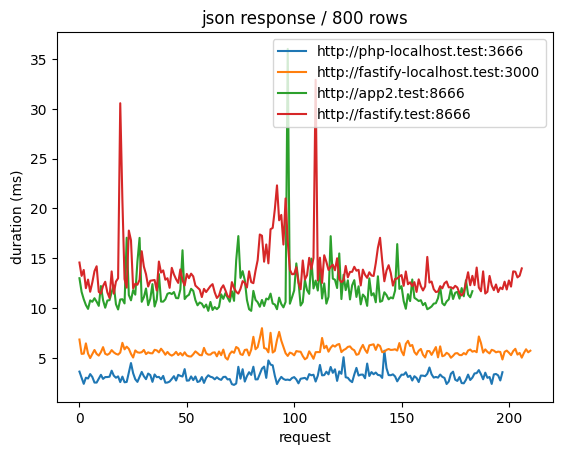

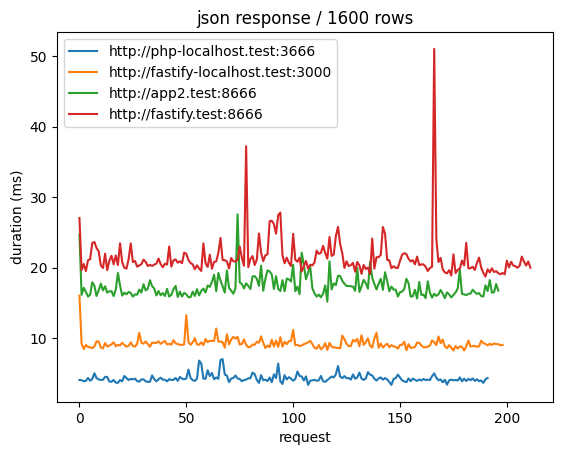

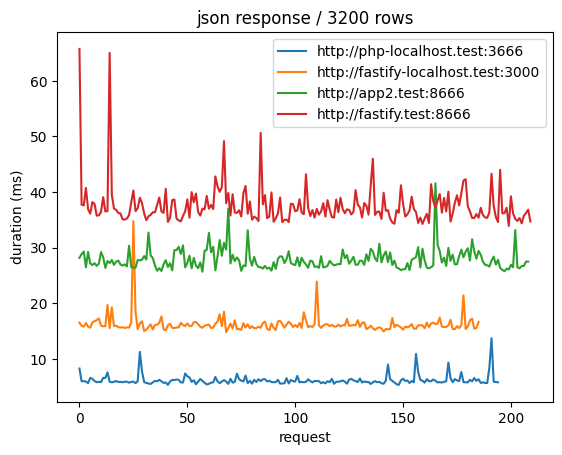

In [49]:

# send 1000 requests mixing the targets randomly
# compute each target response time
# plot the results

import random
import requests
import time


def send_requests_randomly(targets, nb_requests, limit):
    durations = {}
    # init durations for each target
    for target in targets:
        durations[target] = []

    for i in range(nb_requests):
        target = random.choice(targets)
        start = time.time()
        # add limit as GET parameter
        url = f'{target}?limit={limit}'
        requests.get(url)
        end = time.time()
        duration = 1000 * (end - start)
        # store duration for target
        durations[target].append(duration)
        # print(f'{i} {url} {duration:.2f}ms')

        # time.sleep(0.1)

    return durations


import matplotlib.pyplot as plt
import numpy as np

def run_test(targets, nb_requests, limit):
    requests = send_requests_randomly(targets, nb_requests, limit)

    for target, durations in requests.items():
        plt.plot(durations, label=target)

    # add title
    plt.title(f'json response / {limit} rows')
    # add x axis label
    plt.xlabel('request')
    # add y axis label
    plt.ylabel('duration (ms)')
    # add legend
    plt.legend()
    # save chart to file {limit}rows.png
    plt.savefig(f'{limit}rows.png')
    # build and show chart
    plt.show()

targets = [
    'http://php-localhost.test:3666', # PHP localhost
    'http://fastify-localhost.test:3000', # Fastify localhost
    'http://app2.test:8666',
    'http://fastify.test:8666',
]

limits = [100, 200, 400, 800, 1600, 3200]
nb_requests = 200 * len(targets)
# loop over limits
for limit in limits:
    # run test for each limit
    run_test(targets, nb_requests, limit)



